In [123]:
%matplotlib inline
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [124]:
plt.rcParams['figure.figsize'] = 20, 15
plt.rcParams['axes.labelsize']=92
plt.rcParams['xtick.labelsize']=72
plt.rcParams['ytick.labelsize']=72
plt.rcParams['legend.loc']='lower right'
plt.rcParams['legend.fontsize'] = 48
plt.rcParams['lines.linewidth'] = 6
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.color'] = 'k'
plt.rcParams['boxplot.boxprops.linewidth'] = 8
plt.rcParams['boxplot.whiskerprops.linewidth']=8
plt.rcParams['boxplot.flierprops.markeredgewidth']=10
plt.rcParams['boxplot.capprops.linewidth'] =8
plt.rcParams['boxplot.medianprops.color']='C1'
plt.rcParams['boxplot.medianprops.linewidth'] =8
plt.rcParams['boxplot.meanprops.markersize'] = 24

In [125]:
modes = ['ind', 'iden', 'uni', 'fmax', 'fsum', 'buc_con', 'buc_qsd']
mode_names = ['ind', 'iden', 'util', 'MEgal', 'WUtil', 'buc_con', 'buc_qsd']
modes2 = ['ind', 'iden', 'uni','fsum','buc_qsd']
mode_names2 = ['Ind', 'Iden', 'Util', 'WUtil', 'Water']

In [136]:
data = []
for i in range(11,21):
    data_path = './data/mm_per_vary_k20_t10_eps0.01_sam10000_tol0.001_run{}.pkl'.format(i)
    fo = open(data_path, 'rb')
    data.append(pickle.load(fo))
    fo.close()

In [137]:
total_errors = data[0]['total_errors']
max_ratio_errors = data[0]['max_ratio_errors']
inters = data[0]['inters']

In [138]:
for i in range(1,10):
    total_errors = total_errors.append(data[i]['total_errors'], ignore_index=True)
    max_ratio_errors = max_ratio_errors.append(data[i]['max_ratio_errors'], ignore_index=True)
    inters = inters.append(data[i]['inters'], ignore_index=True)

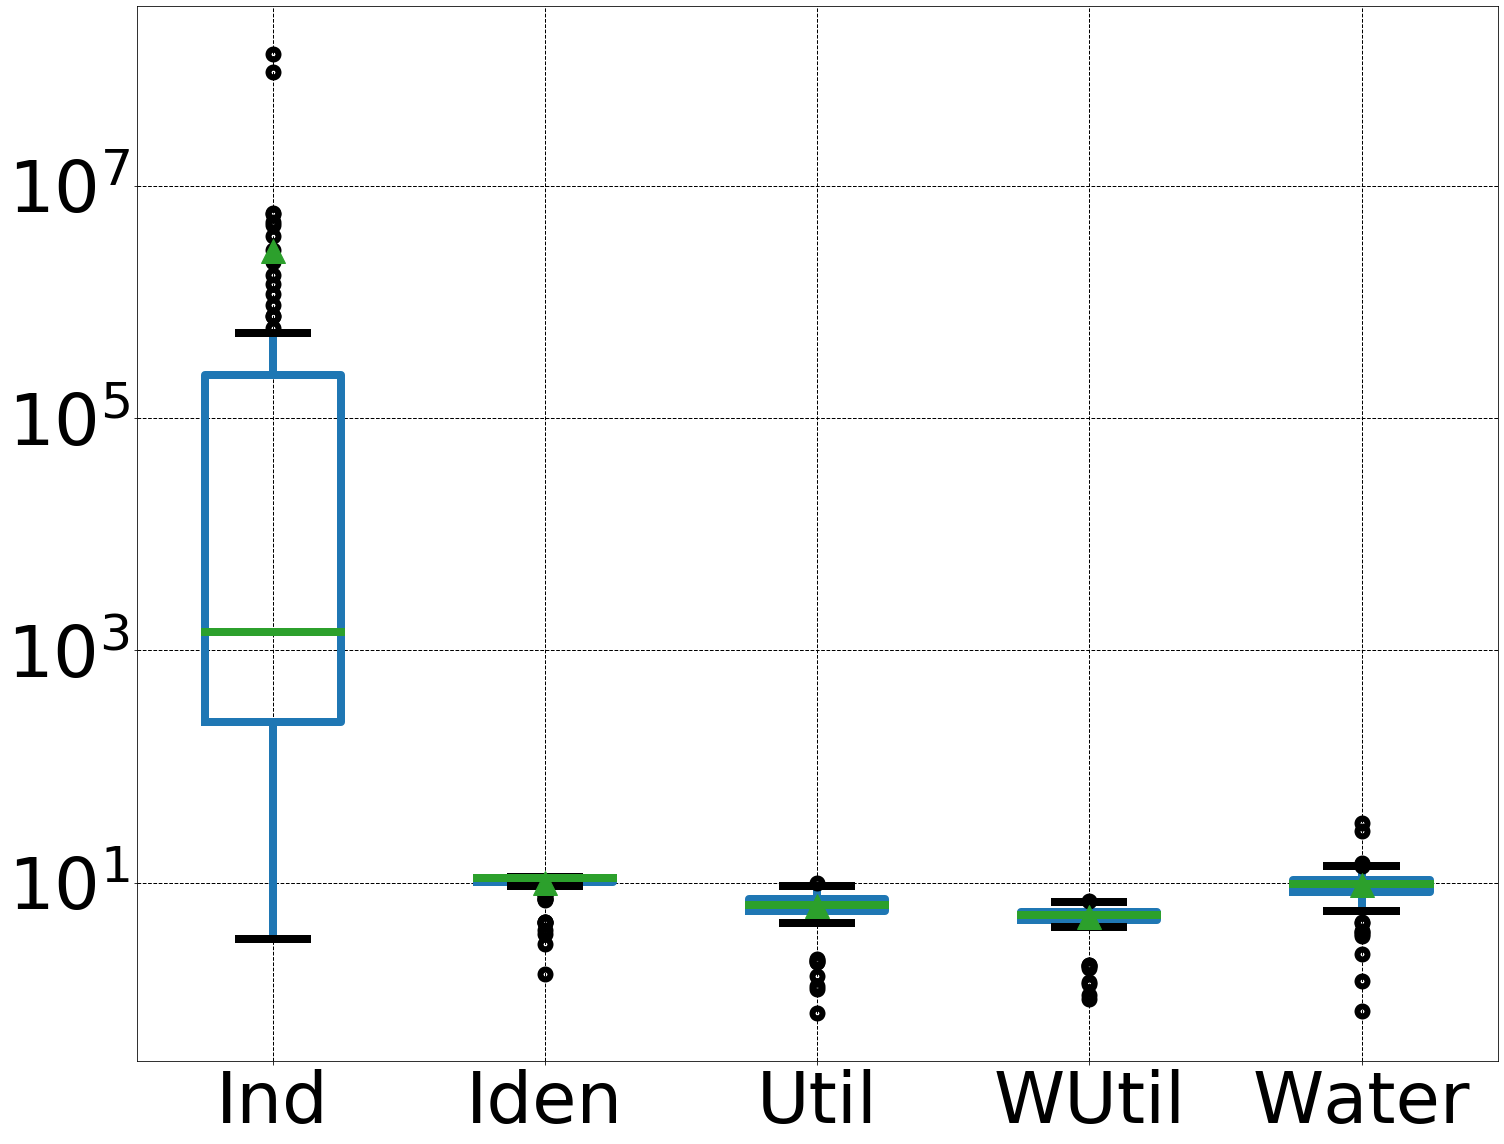

In [139]:
plt.figure(figsize=(21,16))
total_errors.boxplot(column = modes2, showmeans=True, meanprops={'color':'C3'})
plt.xticks(range(1,len(modes2)+1), mode_names2)
plt.yscale('log')

#plt.ylim((1,1e2))
#plt.ylabel('Total Error')
plt.tight_layout()
plt.savefig('data_total_errors.pdf', bbox_inches='tight')
plt.show()

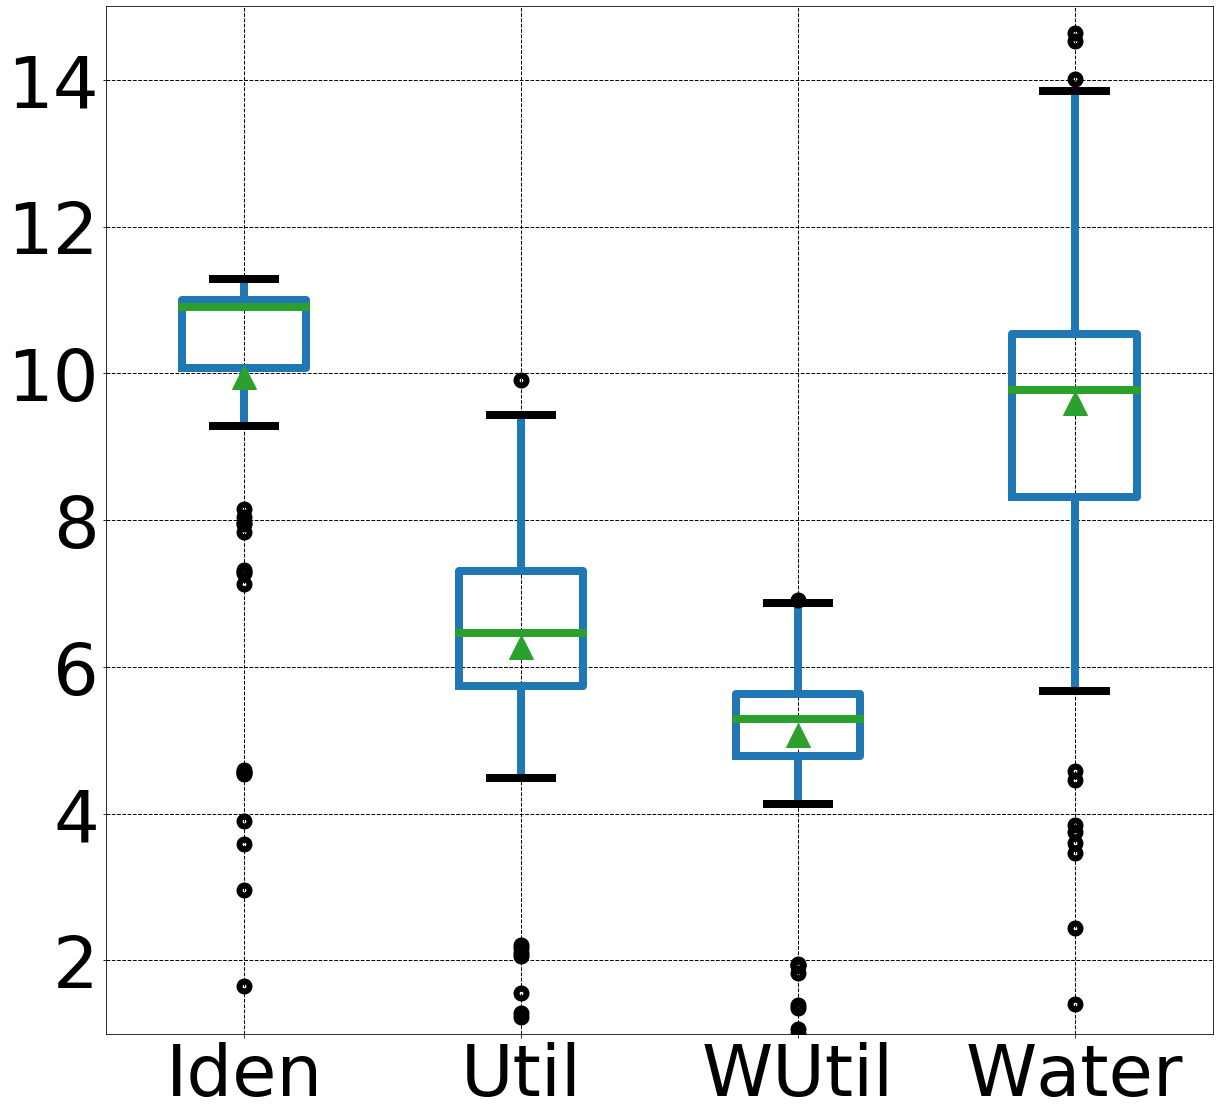

In [140]:
plt.figure(figsize=(18,16))
total_errors.boxplot(column = modes2[1:], showmeans=True, meanprops={'color':'C3'})
plt.xticks(range(1,len(modes2)), mode_names2[1:])
#plt.yscale('log')
plt.ylim((1,15))
#plt.ylabel('Total Error')
plt.tight_layout()
plt.savefig('data_total_errors_2.pdf', bbox_inches='tight')
plt.show()

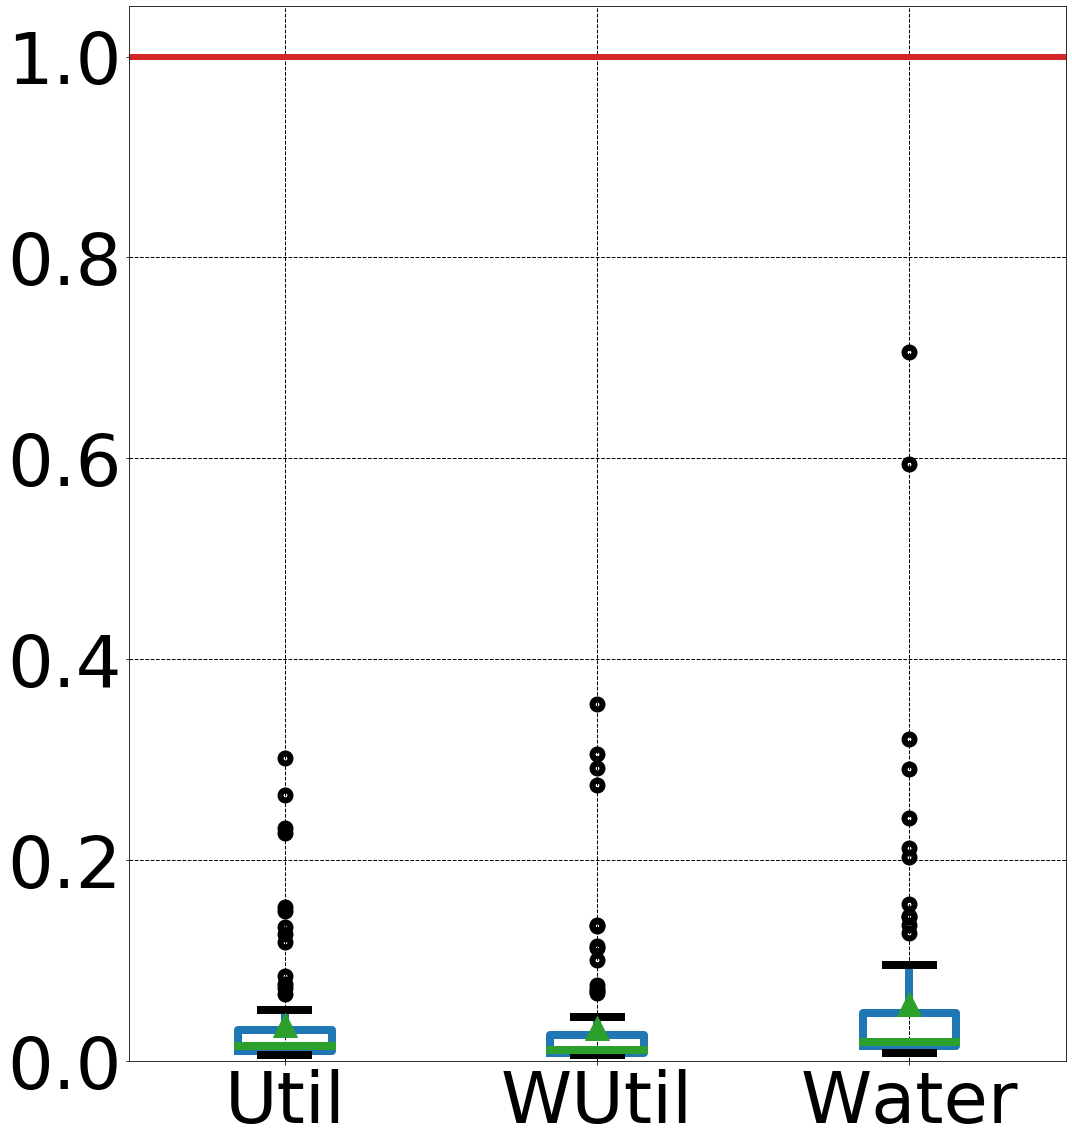

In [141]:
plt.figure(figsize=(15,16))
max_ratio_errors.boxplot(column = modes2[2:], showmeans=True)
plt.xticks(range(1,len(modes2)-1), mode_names2[2:])
plt.ylim((0,1.05))
#plt.ylabel('Max Ratio Error')
plt.axhline(y=1, color='C3', linewidth=6)
plt.tight_layout()
plt.savefig('data_max_ratio_errors.pdf', bbox_inches='tight')
plt.show()

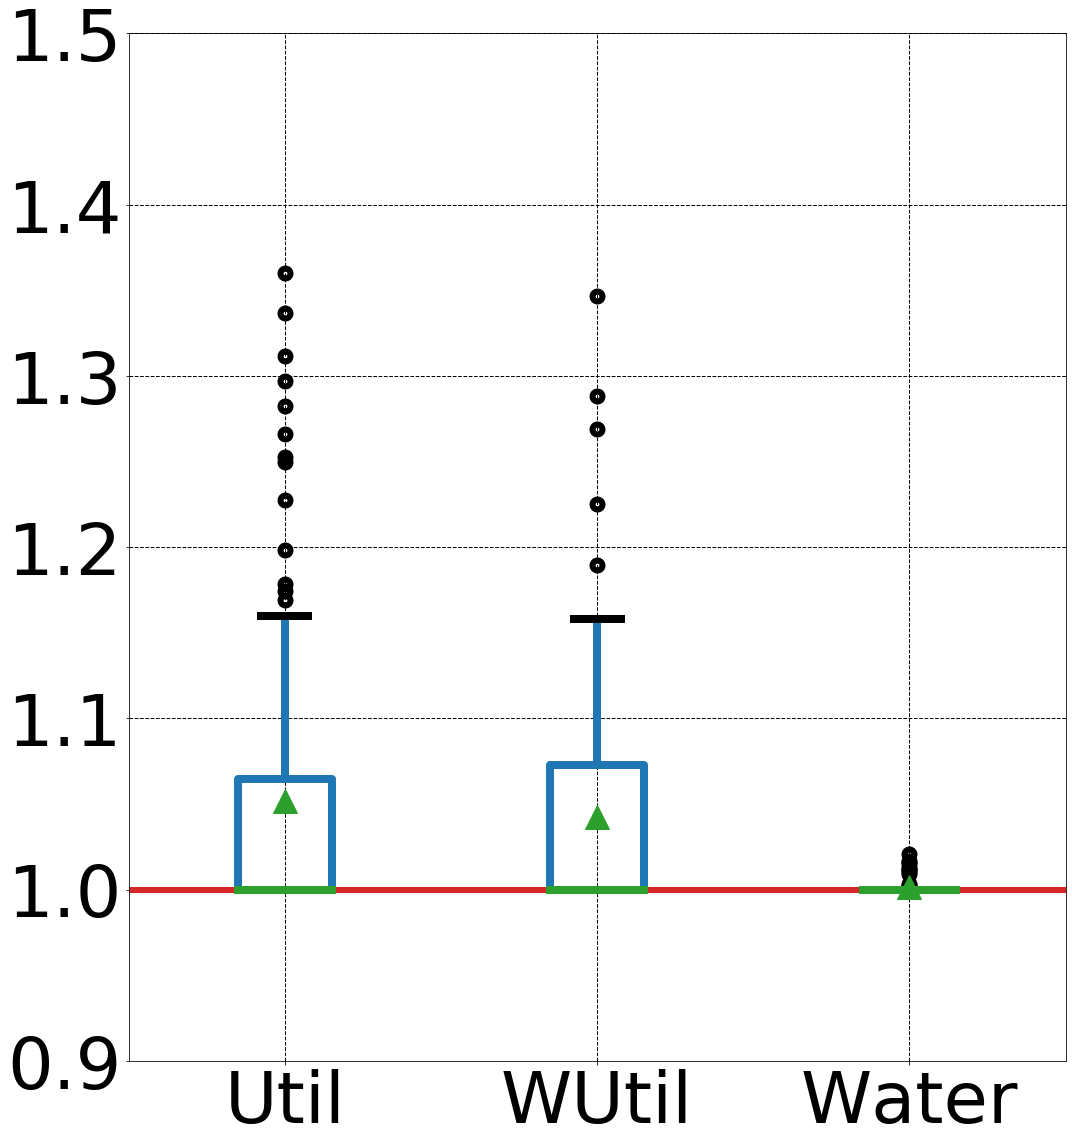

In [142]:
plt.figure(figsize=(15,16))
inters2 =inters+1
inters2.boxplot(column = modes2[2:], showmeans=True)
plt.xticks(range(1,len(modes2)-1), mode_names2[2:])
plt.ylim((0.9,1.5))
plt.axhline(y=1, color='C3', linewidth=6)
#plt.yscale('log')
#plt.ylabel('Interferences')
plt.tight_layout()
plt.savefig('data_inters.pdf', bbox_inches='tight')
plt.show()

In [143]:
data2 = []
for i in range(1,11):
    data2_path = './data/mm_per_vary_k20_t10_eps0.01_sam10000_tol0.001_run{}.pkl'.format(i)
    fo = open(data2_path, 'rb')
    data2.append(pickle.load(fo))
    fo.close()

In [134]:
total_errors2 = data2[0]['total_errors']
max_ratio_errors2 = data2[0]['max_ratio_errors']
inters2 = data2[0]['inters']

In [135]:
for i in range(1,10):
    total_errors2 = total_errors2.append(data2[i]['total_errors'], ignore_index=True)
    max_ratio_errors2 = max_ratio_errors2.append(data2[i]['max_ratio_errors'], ignore_index=True)
    inters2 = inters2.append(data2[i]['inters'], ignore_index=True)

In [24]:
water1 = total_errors['buc_qsd']
water2 = total_errors2['buc_qsd']

In [25]:
water = pd.concat((water1, water2), axis=1,ignore_index=True)
ratio_err = max_ratio_errors['buc_qsd'].to_numpy()
water

,0,1
0,9.304550,9.304550
1,9.765134,9.765134
2,9.621092,9.621092
3,9.546690,9.546689
4,9.782896,9.782896
...,...,...
95,8.856434,8.856434
96,8.641968,8.641968
97,8.870562,8.870562
98,8.375929,8.375929


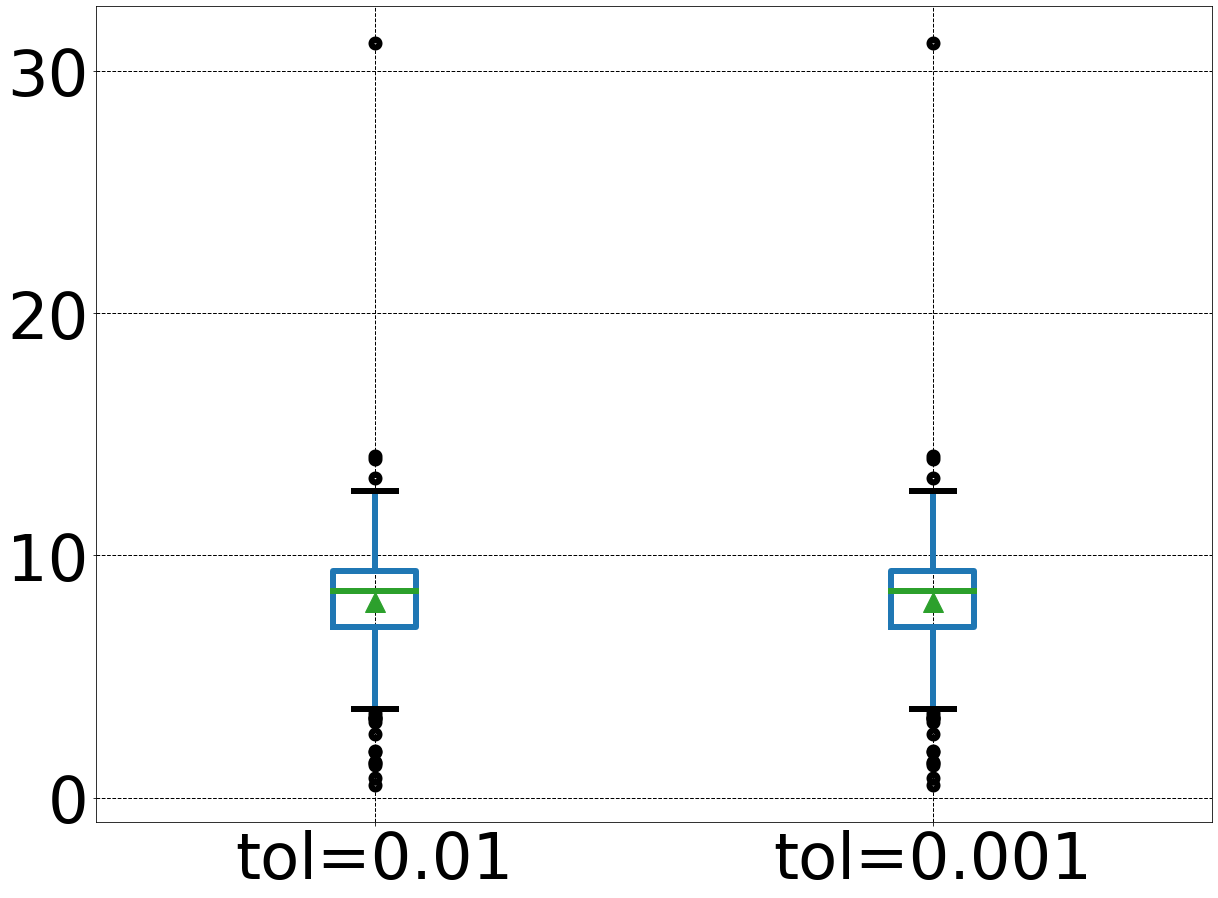

In [26]:
water.boxplot(showmeans=True)
plt.xticks(range(1,3), ['tol=0.01', 'tol=0.001'])
plt.show()